In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
spam_df = pd.read_csv('spam.csv', encoding='mac_roman')
spam_df = spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [107]:
spam_df['v1'] = spam_df['v1'].astype('category')

cat_columns = spam_df.select_dtypes(['category']).columns

spam_df[cat_columns] = spam_df[cat_columns].apply(lambda x: x.cat.codes)



In [41]:
ham = spam_df[spam_df['v1'] == 0]

In [43]:
spam = spam_df[spam_df['v1'] == 1]

In [46]:
spam_precentage = len(spam)/len(spam_df)*100
ham_percentafe = len(ham)/len(spam_df)*100

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
vectorizer = CountVectorizer()

spam_ham = vectorizer.fit_transform(spam_df['v2'])

In [64]:
spam_ham.shape

(5572, 8666)

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [119]:
label = spam_df['v1'].values

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(spam_ham,label,test_size = 0.2)

In [112]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
y_pred_train = NB_classifier.predict(X_train)
y_pred_test = NB_classifier.predict(X_test)

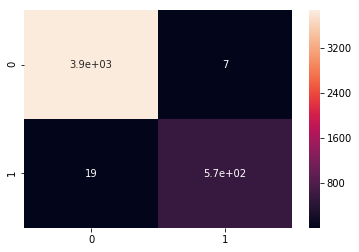

In [115]:
cm = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm, annot = True)

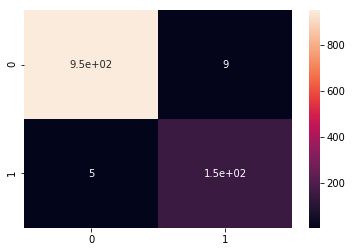

In [116]:
cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm, annot = True)

In [118]:
print(classification_report(y_test,y_pred_test))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       959
          1       0.94      0.97      0.96       156

avg / total       0.99      0.99      0.99      1115

